[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alikn/coding_for_analytics/blob/main/pandas/8_data_handling_with_pandas.ipynb)

In this notebook, we are going to see an short example of handling data and analyzing it using Pandas. The dataset used in this notebook is for Covid patients. 

[Covid-19 dataset](https://www.kaggle.com/datasets/meirnizri/covid19-dataset)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5)

### Loading the dataset

In [3]:
covid_df = pd.read_csv("https://alik-courses.web.app/coding-for-analytics/covid_data.csv")
covid_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


### Summarizing the data

Based on dataset docs, in the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
covid_df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


Let's take a look at the target variable.

In [6]:
covid_df['DATE_DIED'].value_counts()

9999-99-99    971633
06/07/2020      1000
               ...  
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In this notebook, we are going to focus on age, obesity and diabetes and their impact on the death of covid patients.

In [7]:
covid_df['OBESITY'].value_counts()

2     885727
1     159816
98      3032
Name: OBESITY, dtype: int64

In [8]:
covid_df['AGE'].value_counts()

30     27010
31     25927
       ...  
121        1
113        1
Name: AGE, Length: 121, dtype: int64

In [9]:
covid_df['DIABETES'].value_counts()

2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64

### Clean up

Let's remove the rows in which there is any missing data.

In [10]:
# Filtering
clean_covid_df = covid_df[(covid_df['OBESITY'] != 98) & (covid_df['DIABETES'] != 98)]

In [11]:
clean_covid_df.shape

(1044613, 21)

### Create target label

In the dataset, we do not have a column which tells us if the patient passed away or not. Instead we have DATE_DIED column which contains the date of death or "9999-99-99" if the patient survived. Let's create a new column based on the DATE_DIED to simplify the target label.

In [12]:
# Transformation
clean_covid_df['PASSED'] = (clean_covid_df['DATE_DIED'] != '9999-99-99').astype(int)

C:\Users\ali_k\AppData\Local\Temp\ipykernel_11680\1982980108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_covid_df['PASSED'] = (clean_covid_df['DATE_DIED'] != '9999-99-99').astype(int)


In [13]:
clean_covid_df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,PASSED
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,7,97,0
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,7,97,0


We can create a new dataframe which only includes the columns we care about.

In [14]:
patients_df = clean_covid_df[['AGE', 'OBESITY', 'DIABETES', 'PASSED']]
patients_df

,AGE,OBESITY,DIABETES,PASSED
0,65,2,2,1
1,72,1,2,1
...,...,...,...,...
1048573,28,2,2,0
1048574,52,2,2,0


### Target groups stats

Let's take a look at some stats differences between the patients who survived vs the ones who passed away using the other data columns.

In [15]:
# Filtering
passed_patients_df = patients_df[patients_df['PASSED'] == 1]
survived_patients_df = patients_df[patients_df['PASSED'] == 0]

In [16]:
# Aggregation
passed_patients_df.describe()

,AGE,OBESITY,DIABETES,PASSED
count,75988.000000,75988.000000,75988.000000,75988.0
mean,61.096831,1.773477,1.629284,1.0
...,...,...,...,...
75%,72.000000,2.000000,2.000000,1.0
max,119.000000,2.000000,2.000000,1.0


In [17]:
# Aggregation
survived_patients_df.describe()

,AGE,OBESITY,DIABETES,PASSED
count,968625.000000,968625.000000,968625.000000,968625.0
mean,40.249429,1.853043,1.900242,0.0
...,...,...,...,...
75%,50.000000,2.000000,2.000000,0.0
max,121.000000,2.000000,2.000000,0.0


### Effect of age on covid death rate 

In [20]:
# Grouping and aggregation in each group
age_df = patients_df.groupby("AGE").PASSED.mean().to_frame().reset_index()
age_df

,AGE,PASSED
0,0,0.053864
1,1,0.037996
...,...,...
119,120,0.000000
120,121,0.000000


<AxesSubplot: xlabel='AGE'>

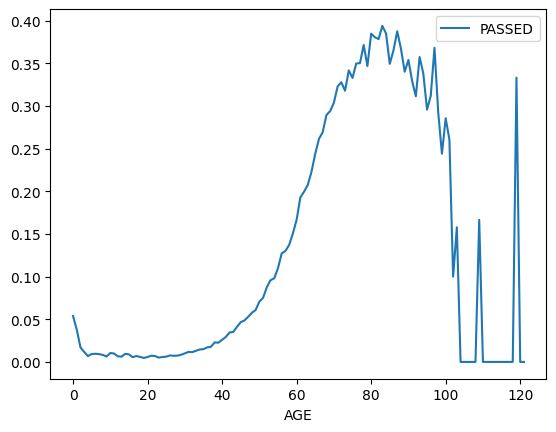

In [21]:
age_df.plot(kind='line', x='AGE', y='PASSED')

### Effect of obesity on covid death rate

In [23]:
# Grouping and aggregation in each group
obesity_df = patients_df.groupby('OBESITY').PASSED.mean().to_frame().reset_index()
obesity_df

,OBESITY,PASSED
0,1,0.107879
1,2,0.066408


<AxesSubplot: xlabel='OBESITY'>

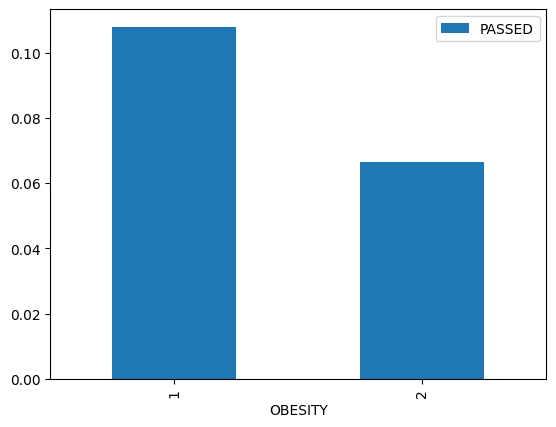

In [24]:
obesity_df.plot(kind='bar', x='OBESITY', y='PASSED')

### Effect of diabetes on death rate

In [25]:
# Grouping and aggregation in each group
diabetes_df = patients_df.groupby('DIABETES').PASSED.mean().to_frame().reset_index()
diabetes_df

,DIABETES,PASSED
0,1,0.225725
1,2,0.051987


<AxesSubplot: xlabel='DIABETES'>

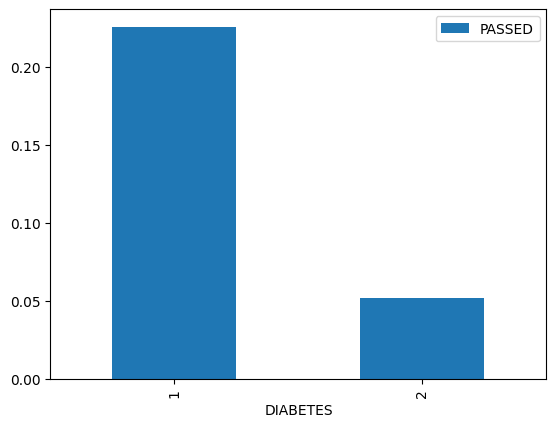

In [27]:
diabetes_df.plot(kind='bar', x='DIABETES', y='PASSED')

### Correlation

In [28]:
patients_df.corr()

,AGE,OBESITY,DIABETES,PASSED
AGE,1.000000,-0.089942,-0.331267,0.320425
OBESITY,-0.089942,1.000000,0.117159,-0.057442
DIABETES,-0.331267,0.117159,1.000000,-0.216970
PASSED,0.320425,-0.057442,-0.216970,1.000000


In [30]:
import seaborn as sns

<AxesSubplot: >

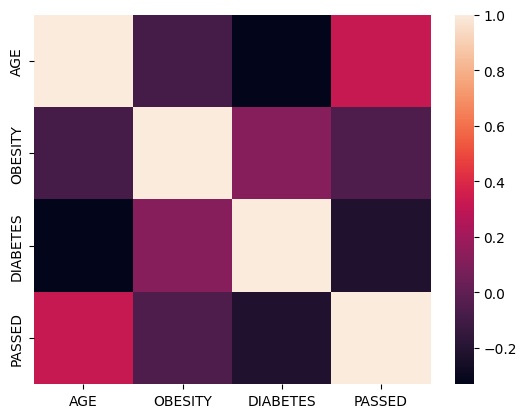

In [31]:
sns.heatmap(patients_df.corr())